# $H \rightarrow ZZ \rightarrow 4\ell$ (VBF vs. ggF) exercise 03
 >__Created__:  2018 Harrison B. Prosper



### Exercise
  1. Build deep network, using __MLPClassifier__, to discriminate between the Higgs boson production in the vector boson fusion mode from its production via gluon-gluon fusion.  $\Delta\eta_{jj}, m_{jj})$, which in the dataframe are $detajj$ and $massjj$, respectively
  1. Try one and two hidden layers.
  1. Vary the number of nodes/layer

In [18]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib
from sklearn.metrics import roc_curve, auc

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [36]:
# update fonts
FONTSIZE = 20
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : FONTSIZE}

mp.rc('font', **font)

### Load Higgs boson data into memory


In [38]:
train_data = pd.read_csv('../../datasets/hzz_vbf_ggf_train.csv') 
test_data  = pd.read_csv('../../datasets/hzz_vbf_ggf_test.csv')
train_data[:10]

,Z1mass,Z2mass,pt4l,eta4l,massjj,detajj,HT,dRZ1Z2,target
0,90.29,14.06,215.80,-0.1829,86.08,0.3362,324.50,0.4905,0.0
1,86.57,37.24,217.80,0.3579,310.20,2.8900,219.90,0.1691,0.0
2,97.37,13.46,138.90,-0.8100,220.40,2.9030,106.30,0.4296,0.0
3,91.96,18.97,54.89,-2.6840,583.50,5.0130,101.60,1.7580,1.0
4,91.45,12.06,187.80,-0.5866,55.98,0.3771,220.20,0.6852,1.0
5,91.56,23.99,70.43,-1.4530,76.01,1.0250,96.66,1.3180,0.0
6,90.72,22.09,56.87,-0.6028,369.80,5.0490,60.70,1.1900,1.0
7,89.51,14.47,79.13,-0.7406,606.80,5.8350,70.59,0.9895,1.0
8,90.99,29.19,131.80,-1.5150,400.70,3.8210,119.00,0.5383,0.0
9,92.10,26.99,86.19,-1.3920,552.10,4.7950,106.70,1.4280,1.0


### Plot training data

In [39]:
def plotData(data, xmin=0, xmax=8, ymin=0, ymax=2000, N=1000, ftsize=FONTSIZE):
    
    # set size of figure
    plt.figure(figsize=(8, 8));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'$\Delta\eta_{jj}$', fontsize=ftsize)
    plt.ylabel(r'$m_{jj}$ (GeV)', fontsize=ftsize)
    
    # split into sig and bkg for the purposes of plotting
    sig = data[data.target > 0.5][:N]
    bkg = data[data.target < 0.5][:N]

    plt.scatter(sig.detajj, sig.massjj, marker='o',
                s=50, c='blue', alpha=0.3, label='VBF')
    pl.legend(loc='upper left') # activate legend
    
    plt.scatter(bkg.detajj, bkg.massjj, marker='*',
                s=100, c='red',  alpha=0.3, label='ggF')
    pl.legend(loc='upper left') # activate legend
    
    plt.savefig('03_higgs_vbf_ggf_variables.png')
    plt.show()

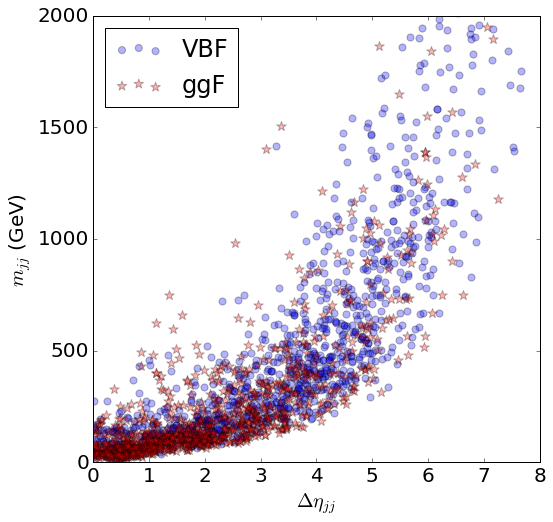

In [40]:
plotData(train_data)

### Prepare data for training/testing

In [41]:
def standardize_data(train_data, test_data, inputs):
    scaler  = StandardScaler()
    scaler.fit(train_data[inputs])
    
    X_train = scaler.transform(train_data[inputs])
    X_test  = scaler.transform(test_data[inputs])
    y_train = train_data['target']
    y_test  = test_data['target']

    return (X_train, X_test, y_train, y_test, scaler)

In [42]:
inputs = ['detajj', 'massjj']
X_train, X_test, y_train, y_test, scaler = standardize_data(train_data, test_data, inputs)

### Define function space

In [67]:
dnn = MLPClassifier(hidden_layer_sizes=(12,10), 
                    max_iter=500, 
                    alpha=1e-3,
                    solver='adam', 
                    verbose=0, 
                    tol=1e-6, 
                    warm_start=False,
                    random_state=1)

# possible combinations of params
params = {'hidden_layer_sizes': [(5,), (5,5), (5,5,5), (5,5,5,5)]}

### Train classifier

In [69]:
print "*** TRAINING ***"
#rcv = GridSearchCV(dnn, params, verbose=1)
#rcv.fit(X_train, y_train)

#print "Best set of parameters: %s" % rcv.best_params_
#mlp = rcv.best_estimator_
#mlp.fit(X_train, y_train)

mlp = dnn
mlp.verbose=1
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))      
print("Test set score:     %f" % mlp.score(X_test,  y_test))

filename = '03_higgs_vbf_ggf_dnn.pkl'
print "save to %s" % filename
joblib.dump([mlp, scaler], filename)

*** TRAINING ***
Iteration 1, loss = 0.62389050
Iteration 2, loss = 0.60276107
Iteration 3, loss = 0.59909852
Iteration 4, loss = 0.59628924
Iteration 5, loss = 0.59453920
Iteration 6, loss = 0.59341782
Iteration 7, loss = 0.59217229
Iteration 8, loss = 0.59082000
Iteration 9, loss = 0.58933764
Iteration 10, loss = 0.58721382
Iteration 11, loss = 0.58557477
Iteration 12, loss = 0.58437267
Iteration 13, loss = 0.58321225
Iteration 14, loss = 0.58246041
Iteration 15, loss = 0.58211860
Iteration 16, loss = 0.58168890
Iteration 17, loss = 0.58133961
Iteration 18, loss = 0.58127174
Iteration 19, loss = 0.58089445
Iteration 20, loss = 0.58082553
Iteration 21, loss = 0.58084616
Iteration 22, loss = 0.58079704
Iteration 23, loss = 0.58071273
Iteration 24, loss = 0.58066848
Iteration 25, loss = 0.58047653
Iteration 26, loss = 0.58041058
Iteration 27, loss = 0.58042967
Iteration 28, loss = 0.58034014
Iteration 29, loss = 0.58048389
Iteration 30, loss = 0.58025594
Iteration 31, loss = 0.58057059


['03_higgs_vbf_ggf_dnn.pkl']

### Plot loss curve vs. epochs

In [70]:
def plotLoss(mlp, ftsize=FONTSIZE):
    y    = mlp.loss_curve_
    x    = np.array(range(len(y)))+1

    ymin = 0.99*min(y)
    ymax = 1.01*max(y)
    epoch= range(len(y))
    xmin = 0
    xmax = len(x)
    
    # set size of figure
    plt.figure(figsize=(8,4));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'epoch', fontsize=ftsize)
    plt.ylabel(r'loss',  fontsize=ftsize)
    
    # choose color of points
    plt.plot(x, y, 'b-')
    plt.savefig('03_higgs_vbf_ggf_dnn_loss.png')
    plt.show()

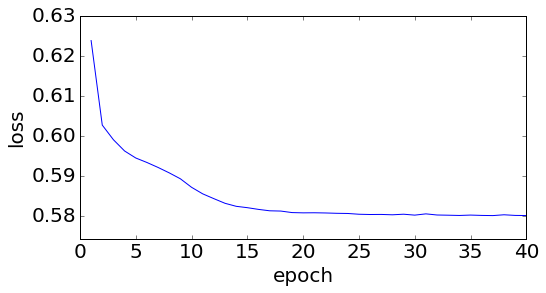

In [71]:
plotLoss(mlp)

### Plot discriminant distributions

In [72]:
def plotDistribution(mlp, X, y, nbins=100, ftsize=FONTSIZE, fgsize=(12,8)):

    # predict_proba returns (prob(class1), prob(class2))
    p  = [x for (_, x) in mlp.predict_proba(X)]

    df = pd.DataFrame({'target': y, 'prob': p}) 
    s  = df[df.target > 0.5] 
    b  = df[df.target < 0.5] 

    # set size of figure
    plt.figure(figsize=fgsize)
    
    plt.hist(b.prob, 
             bins=nbins, 
             color=(1,0,0),
             alpha=0.3,
             range=(0,1), 
             normed=True, 
             label=r'$H \rightarrow ZZ \rightarrow 4\ell$ (ggF)') 
    pl.legend(fontsize='small') # show legend using specified "label"
    
    plt.hist(s.prob, 
             bins=nbins, 
             color=(0,1,0),
             alpha=0.3,
             range=(0,1), 
             normed=True, 
             label=r'$H \rightarrow ZZ \rightarrow 4\ell$ (VBF)')
    pl.legend(fontsize='small') # show legend using specified "label"
       
    # adjust y limits
    axes = plt.gca()
    ymin, ymax = axes.get_ylim()
    delta = 0.2
    ii = int(1.3*ymax/delta)
    ymax = ii * 0.2
    axes.set_ylim((0, ymax))
    plt.savefig("03_higgs_vbf_ggf_distributions.png")
    plt.show()

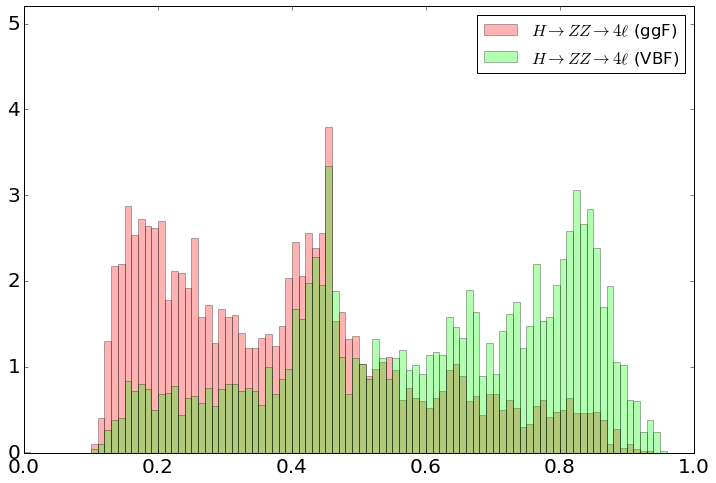

In [73]:
plotDistribution(mlp, X_test, y_test)

In [74]:
def plotROC(y, p):
    bad, good, _ = roc_curve(y, p)
    roc_auc = auc(bad, good)
    plt.figure(figsize=(8, 8))

    plt.plot(bad, good, color='red',
             lw=2, label='ROC curve, AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('fraction of ggF', fontsize=18)
    plt.ylabel('fraction of VBF', fontsize=18)
    plt.legend(loc="lower right", fontsize=18)
    plt.show()

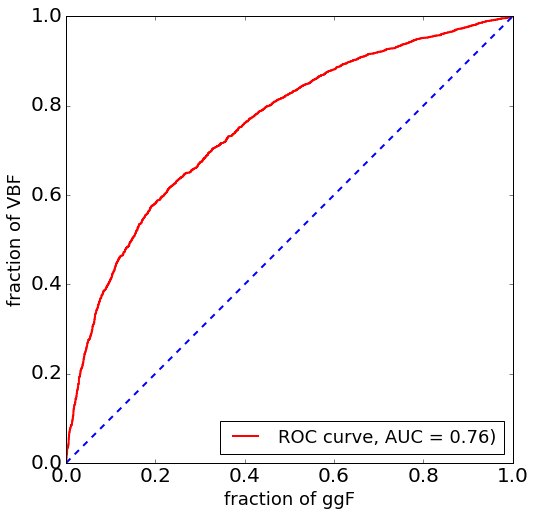

In [75]:
# predict_proba returns (prob(class1), prob(class2))
p  = [x for (_, x) in mlp.predict_proba(X_test)]
plotROC(y_test, p)

In [76]:
def plotResults(mlp, scaler, data, inputs,
                xmin=0, xmax=8, ymin=0, ymax=2000, N=2000,
                ftsize=FONTSIZE):
    
    sig = data[data.target > 0.5][:N] 
    bkg = data[data.target < 0.5][:N] 

    # set size of figure
    plt.figure(figsize=(8, 8))

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'$\Delta\eta_{jj}$', fontsize=ftsize)
    plt.ylabel(r'$m_{jj}$ (GeV)', fontsize=ftsize)
    
    # plot data
    plt.scatter(sig.detajj, sig.massjj, marker='o',
                s=50, c='blue', alpha=0.2, label='VBF')
    pl.legend(loc='upper left', fontsize=18) # activate legend
    
    plt.scatter(bkg.detajj, bkg.massjj, marker='*',
                s=100, c='red',  alpha=0.2, label='ggF')
    pl.legend(loc='upper left', fontsize=18) # activate legend
    
    # superimpose a contour plot
    # 1. first create a mesh
    # 2. compute network output at all mesh points
    npoints= 100
    xdelta = float(xmax-xmin)/npoints
    ydelta = float(ymax-ymin)/npoints
    xx = np.arange(xmin, xmax, xdelta)
    yy = np.arange(ymin, ymax, ydelta)
    XX, YY = np.meshgrid(xx, yy)
 
    # convert messh to a dataframe
    detajj = XX.flatten()
    massjj = YY.flatten()
    XY  = pd.DataFrame({'detajj': detajj, 
                        'massjj': massjj})
   
    # apply standardization
    P = scaler.transform(XY)
    # compute network value at every grid point
    # then reshape to an (npoints x npoints) array
    Z = np.array(map(lambda x: x[-1], mlp.predict_proba(P))).reshape([len(XX), len(XX)])
   
    # plot contours
    mylevels = np.arange(0,1,0.02)
    plt.contour(XX, YY, Z, levels=mylevels)
    plt.savefig('03_higgs_vbf_ggf_dnn_contours.png');

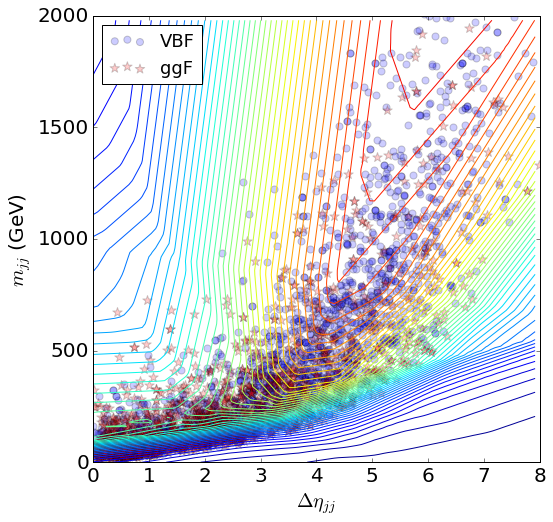

In [77]:
plotResults(mlp, scaler, test_data, inputs)